In [50]:
# Q2

import numpy as np
import math as m
import matplotlib.pyplot as plt
from PIL import Image

def make_kernel(sigma):
    k = m.ceil(6 * sigma)
    if k % 2 == 0:  # If k is even, make it odd by adding 1
        k += 1
    k_mid = k // 2
    gaussian_filter = np.zeros((k,k) , np.float32)
    for y in range(-k_mid , k_mid+1):
        for x in range(-k_mid , k_mid+1 ):
            normal = 1 / ( 2 * np.pi * sigma**2 )
            exp_term = np.exp(-( x**2 + y**2 ) / (2 * sigma**2))
            gaussian_filter [ y + k_mid , x + k_mid ] = normal * exp_term

    gaussian_filter = gaussian_filter / np.sum(gaussian_filter)  # to normalize the gaussian filter
    return gaussian_filter

def pad(sigma , image):

 h,w = image.shape[:2]
 k = m.ceil(6*sigma)+1
 output_image = np.zeros((h, w , 3), dtype=np.float32)
 output_image = np.pad(image, ((int((k - 1) / 2), int((k - 1) / 2)), (int((k - 1) / 2), int((k - 1) / 2)), (0, 0)), 'constant')

 return output_image

def convolution(img,sigma):
    kernel = make_kernel(sigma)
    pad=kernel.shape[0]//2
    pad_img=np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad,3))
    pad_img[pad:img.shape[0]+pad,pad:img.shape[1]+pad,:]=img
    cov_img=np.zeros((img.shape[0],img.shape[1],3))
    for c in range(0,3):
        for ii in range(img.shape[0]):
            for jj in range(img.shape[1]):
                i=ii+pad
                j=jj+pad
                img_bit=pad_img[i-pad:i+pad+1,j-pad:j+pad+1,c]
                cov=np.sum(img_bit*kernel)
                cov_img[ii,jj,c]=cov
    plt.imshow(cov_img)
    return cov_img


def PSNR(f , f_hat):
    total_pixels = f.size // 3  
    MSE = np.sum((f - f_hat) ** 2) / (total_pixels * 3)
    PSNR = 10 * np.log10(1 / (MSE + 1e-10))  # Added small value to prevent division by zero
    return PSNR

import cv2 as cv
# Read the RGB image
krishna_g = cv.imread("/home/gadha/Desktop/Courses/ISP_2024/lab_10/krishna_0_001.png")
krishna_f = cv.imread("/home/gadha/Desktop/Courses/ISP_2024/lab_10/krishna.png")

# Convert the image to floating point format and normalize intensity range to [0, 1]
g = krishna_g.astype(float) / 255.0
f = krishna_f.astype(float) / 255.0
sigma=[.1,.2,.3,.4,.5]
Psnr_gau=[]
img_gau=[]
for i in range(len(sigma)):
    size=7
    # print(sigma[i])
    Kernel=make_kernel(sigma[i])
    cov_img = convolution(g,sigma[i])
    psnr=PSNR(f,cov_img)
    img_gau.append(cov_img)
    Psnr_gau.append(psnr)

print(Psnr_gau)

In [26]:
def PSNR(f , f_hat):
    total_pixels = f.size // 3  
    MSE = np.sum((f - f_hat) ** 2) / (total_pixels * 3)
    PSNR = 10 * np.log10(1 / (MSE + 1e-10))  # Added small value to prevent division by zero
    return PSNR

1
0
1
0
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
[30.03285833786315, 30.032986158848164, 30.163911338959647, 31.261358183523274, 32.02977088377238]


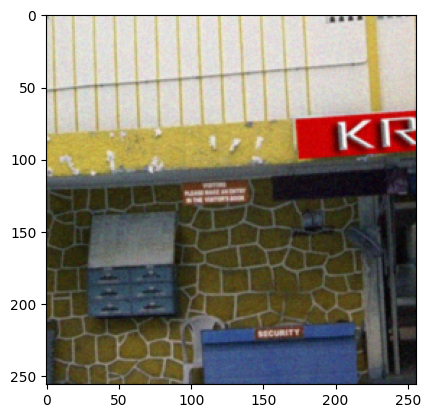

In [52]:
import cv2 as cv
# Read the RGB image
krishna_g = cv.imread("/home/gadha/Desktop/Courses/ISP_2024/lab_10/krishna_0_001.png")
krishna_f = cv.imread("/home/gadha/Desktop/Courses/ISP_2024/lab_10/krishna.png")

# Convert the image to floating point format and normalize intensity range to [0, 1]
g = krishna_g.astype(float) / 255.0
f = krishna_f.astype(float) / 255.0
sigma=[.1,.2,.3,.4,.5]
Psnr_gau=[]
img_gau=[]
for i in range(len(sigma)):
    size=7
    # print(sigma[i])
    Kernel=make_kernel(sigma[i])
    cov_img = convolution(g,sigma[i])
    psnr=PSNR(f,cov_img)
    img_gau.append(cov_img)
    Psnr_gau.append(psnr)

print(Psnr_gau)

In [ ]:
def calculate_gaussian(V_p, V_q ,sigma = 1.0):
    diff = np.linalg.norm(V_p - V_q)
    print(diff)
    return np.exp(-diff**2 / (2 * sigma**2))


In [ ]:
def nlm( image , W , W_sim , sigma):
    pad_size = W + W_sim
    padded_image=np.pad(image,((pad_size,pad_size),(pad_size,pad_size),(0,0)),'constant',constant_values=0)
    filtered_image = np.zeros_like(image)
    for channel in range(3):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                weights = []
                img_patch = []
                m,n=i+pad_size,j+pad_size
                p=padded_image[m-W_sim:m+W_sim+1,n-W_sim:n+W_sim+1,channel]
                p=p.flatten()
                for x in range(m - W , m + W + 1):
                    for y in range(n - W , n + W + 1):
                        q = padded_image[x-W_sim:x+W_sim+1,y-W_sim:y+W_sim+1,channel]
                        q = q.flatten()
                        index = len(q)//2
                        q_ = q[index]
                        gaussian = calculate_gaussian(p,q,sigma)
                        weights.append(gaussian)
                        img_patch.append(q_)
                weights = weights/np.sum(weights)
                filtered_image[i,j,channel] = np.sum(np.dot(weights,img_patch))
    return filtered_image


In [ ]:
def PSNR(f , f_hat):
    total_pixels = f.size // 3  
    MSE = np.sum((f - f_hat) ** 2) / (total_pixels * 3)
    PSNR = 10 * np.log10(1 / (MSE + 1e-10))  # Added small value to prevent division by zero
    return PSNR

In [54]:
# Q1


import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

def calculate_gaussian(V_p, V_q ,sigma = 1.0):
    diff = np.linalg.norm(V_p - V_q)
    print(diff)
    return np.exp(-diff**2 / (2 * sigma**2))

def nlm( image , W , W_sim , sigma):
    pad_size = W + W_sim
    padded_image=np.pad(image,((pad_size,pad_size),(pad_size,pad_size),(0,0)),'constant',constant_values=0)
    filtered_image = np.zeros_like(image)
    for channel in range(3):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                weights = []
                img_patch = []
                m,n=i+pad_size,j+pad_size
                p=padded_image[m-W_sim:m+W_sim+1,n-W_sim:n+W_sim+1,channel]
                p=p.flatten()
                for x in range(m - W , m + W + 1):
                    for y in range(n - W , n + W + 1):
                        q = padded_image[x-W_sim:x+W_sim+1,y-W_sim:y+W_sim+1,channel]
                        q = q.flatten()
                        index = len(q)//2
                        q_ = q[index]
                        gaussian = calculate_gaussian(p,q,sigma)
                        weights.append(gaussian)
                        img_patch.append(q_)
                weights = weights/np.sum(weights)
                filtered_image[i,j,channel] = np.sum(np.dot(weights,img_patch))
    return filtered_image

def PSNR(f , f_hat):
    total_pixels = f.size // 3  
    MSE = np.sum((f - f_hat) ** 2) / (total_pixels * 3)
    PSNR = 10 * np.log10(1 / (MSE + 1e-10))  # Added small value to prevent division by zero
    return PSNR



if __name__ == "__main__":
    # Read the RGB image
    krishna_g = cv.imread("/home/gadha/Desktop/Courses/ISP_2024/lab_10/krishna_0_001.png")
    krishna_f = cv.imread("/home/gadha/Desktop/Courses/ISP_2024/lab_10/krishna.png")

    # Convert the image to floating point format and normalize intensity range to [0, 1]
    g = krishna_g.astype(float) / 255.0
    f = krishna_f.astype(float) / 255.0
    # print(krishna_f.size)
    # params
    W_sim = 3
    # W = 5

    win_half = W_sim // 2
    win_half

    # sigma = 1.0
    sigma_values = [0.1, 0.2, 0.3, 0.4, 0.5]
    W1=3
    W2=5
    Filter_images1=[]
    Filter_images2=[]
    Psnr1=[]
    Psnr2=[]
    for sigma in sigma_values:   
        filter_img1=nlm(g,W1,3,sigma)
        filter_img2=nlm(g,W2,3,sigma)
        Filter_images1.append(filter_img1)
        Filter_images2.append(filter_img2)
        psnr1=PSNR(f,filter_img1)
        psnr2=PSNR(f,filter_img2)
        Psnr1.append(psnr1)
        Psnr2.append(psnr2)
    baseline_psnr=PSNR(f,g)
    baseline_plot=np.ones(5)
    baseline_plot=baseline_plot*baseline_psnr
    plt.plot(np.arange(.1,.6,.1),Psnr1,label='W=3 & Wsim=3')
    plt.plot(np.arange(.1,.6,.1),Psnr2,label='W=5 & Wsim=3')
    plt.plot(np.arange(.1,.6,.1),baseline_plot,label='baseline')
    plt.legend()


3.093302410059012
3.0029512588411715
2.895363460008382
2.766237929009786
2.8474153074503645
2.9680135091835225
3.108035498469451
2.995636965730298
2.7687135464033976
2.5847956942934553
2.3516467027453065
2.48452031887794
2.7180629509460688
2.9996821566856084
2.8658913680272904
2.5048050708401592
2.1149910722455982
1.7649629442400656
2.1377297547682157
2.475497767412223
2.8893206432162644
2.7209187221985256
2.1709805338320254
1.5153146184623831
0.0
1.5360139048454309
2.1861434938321773
2.7401496014859563
2.8030932548638625
2.433190338817228
2.1218694288588353
1.7765744678107493
2.4489277679446846
3.031897577747819
3.57114756954618
2.8151646247897184
2.552166986012197
2.446995977071305
2.3794261049682186
3.1041909634991933
3.6527469873553
4.2219306238974
2.9061390164758856
2.694363090683354
2.7323007023436645
2.816177793136091
3.577476638686271
4.204108131651952
4.787731020000703
3.3637162034607004
3.2827230564165473
3.183792094819838
3.064464381487508
3.13908280082731
3.249326668486723


KeyboardInterrupt: 

In [ ]:
import cv2 as cv 
import numpy as np

# Read the RGB image
krishna_g = cv.imread("/home/gadha/Desktop/Courses/ISP_2024/lab_10/krishna_0_001.png")
krishna_f = cv.imread("/home/gadha/Desktop/Courses/ISP_2024/lab_10/krishna.png")

# Convert the image to floating point format and normalize intensity range to [0, 1]
krishna_g = krishna_g.astype(float) / 255.0
krishna_f = krishna_f.astype(float) / 255.0
print(krishna_f.size)
# params
W_sim = 3
# W = 5

win_half = W_sim // 2
win_half

sigma = 1.0


res = nlm(krishna_g,W = 3, W_sim = 3 , sigma = 1.0)
# print(res)
plt.imshow(res)